In [1]:
import sys
sys.path.append('../../../utils')
import calibrate, simulate, misc
import matplotlib.pyplot as plt

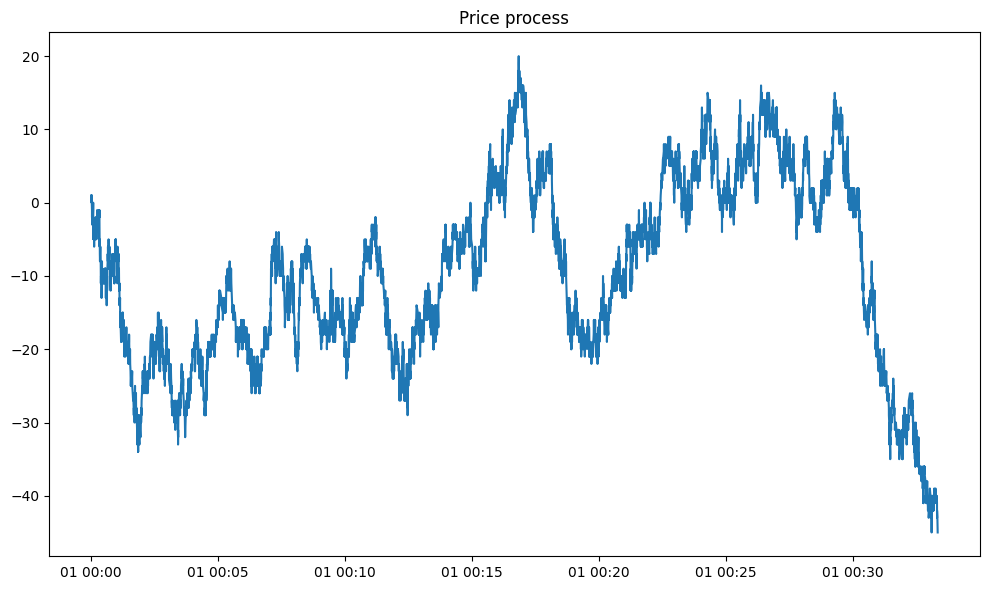

In [6]:
mu, alpha, beta = 1, 1, 2
theta = mu, alpha, beta
pp = simulate.PriceProcess(*theta)
T = 2000
ts = pp.simulate(T)
pp.plot(ts)

In [12]:
def C_th(theta):
    mu, alpha, beta = theta
    kappa = alpha/beta
    Lambda = (2*mu)/(1 - kappa)
    k = 1/(1 + kappa)
    gamma = alpha + beta
    C = lambda tau: Lambda*(k**2 + (1 - k**2) * (1 - np.exp(-gamma * tau)) / (gamma * tau))
    return C

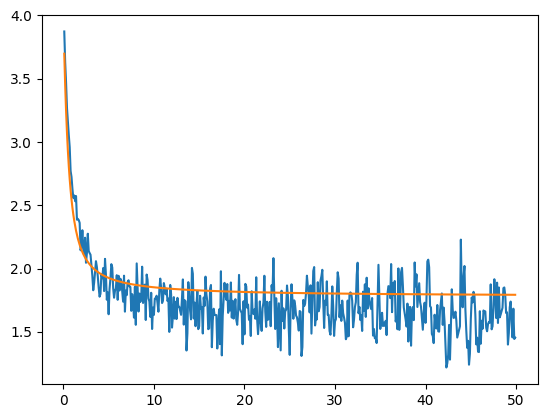

In [15]:
taus = misc.range_timedelta(100, 50000, 100, 'ms')
C_values = [misc.C_func(ts, tau) for tau in taus]
C = C_th(theta)
C_th = [C(tau.total_seconds()) for tau in taus]

plt.plot(taus.dt.total_seconds(), C_values)
plt.plot(taus.dt.total_seconds(), C_th)